**Extracting 21 cm line from SETI Spectra**

This is a code that reads in a text file containing filenames and stores the files containing the 21 cm line in an array. It also defines multiple functions that plot the 21 cm line

*future plan: extract channel containing 21 cm line and plot individual channel*

In [71]:
%matplotlib inline
import pylab as plt
from filterbank_ext import Filterbank, parse_header
import numpy as np
import copy
import scipy as sp
from scipy import signal

In [2]:
#make an array of filenames
files = []
with open('gbt_data/gbt_filenames_2.txt') as text:
	for line in text:
		files.append(line.rstrip())
#working: 0,3,4,5,6,11,12,13,14
#not working: 1,2,7,8,9,10

In [3]:
#here we determine if the file contains a 21cm line and store it into an array "H files"
H_filenames = []
for file in files:
    obs = Filterbank('gbt_data/'+file,load_data = False)
    freq_range = obs.freqs
    if (freq_range.min() < 1420 < freq_range.max()) == True:
        H_filenames.append(file)

Skipping data load...
Skipping data load...
Skipping data load...
Skipping data load...
Skipping data load...
Skipping data load...
Skipping data load...
Skipping data load...
Skipping data load...


In [5]:
#this cell extracts the section of the spectrum containing the 21cm line
H_files=[]
for filename in H_filenames:
    obs = Filterbank('gbt_data/'+filename, f_start=1420, f_stop=1421.5)#, 
                # t_start=0, t_stop=3)
    H_files.append(obs)

In [56]:
#test: plotting all elements in 21 cm array
for file in H_files:
    file.plot_spectrum(f_start=1415, f_stop=1425)
    plt.show()

In [7]:
#defines function to get rid of spikes
def mask(x):
    ma = np.copy(x)
    mean=np.mean(ma)
    for i in np.where(ma > 10**13)[0]:
        ma[i]=ma[i-1]
    return ma

In [8]:
#defines function to calibrate
def calibrate(x, T_sys=10):
    """ Calibrate data using T_cal = (P_on / P_off - 1) * T_sys
    
    Args:
        P_on (np.array): spectrum on source
        P_off (float): value of off-source bandpass 
        T_sts (float): system temperature. It's roughly 10 K for GBT at L-band.
    """
    flux = x#file.data.mean(axis=0)[0]
    off_idx = np.where(flux <= 1.25*np.mean(flux))
#    on_idx = np.where(flux >= np.mean(flux))

    P_off_vals = []
    for i in off_idx:
        P_off_vals.append(flux[i])
    P_off = np.mean(P_off_vals[0])

#    P_on = []
#    for i in on_idx:
#        P_on.append(flux[i])
    
    T_cal = ((flux / P_off) - 1) * T_sys
    
    return T_cal

In [57]:
#plotting all elements in 21 cm array (raw, masked, calibrated)
def plot(file):
    avg = file.data[0].mean(axis=0)
    freq = file.freqs
    
    plt.figure(figsize=(12,3))
    plt.suptitle(file.header['source_name'])

    plt.subplot(131)
    plt.title('Raw')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Power [counts]')
    plt.plot(freq, avg, color='black')

    plt.subplot(132)
    plt.title('Masked')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Power [counts]')
    plt.plot(freq, mask(avg), color='black')
#    plt.show()
    
    plt.subplot(133)
    plt.title('Calibrated')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Power [counts]')
    plt.plot(freq, calibrate(mask(avg)), color='black')
    plt.show()
    
#plot(H_files[0])
    
for file in H_files:
    plot(file)

In [11]:
#extract data from one file
def plot(x):
    obs = Filterbank('gbt_data/'+x)
    plt.figure(figsize=(10, 10))
    plt.subplot(211)
    obs.plot_spectrum()
    #plt.xlim(1420,1425)
    plt.subplot(212)
    obs.plot_spectrum(f_start=1420, f_stop=1425)

In [52]:
#make an array of calibtrated spectra (also stores frequencies in separate array for plotting):
calibrated_spectra = []
freqs = []
for file in H_files:
    x = file.freqs
    freqs.append(x)
    
    y = file.data.mean(axis=0)[0]
    calibrated_spectra.append(calibrate(mask(y)))


In [58]:
#to do: research sky maps
#break make list and edit reminders
#also figure out github

In [82]:
#performs a best fit line (but functionality is specific to size of array)
def fit(x):
    fit = sp.signal.medfilt(x,501)
    return fit

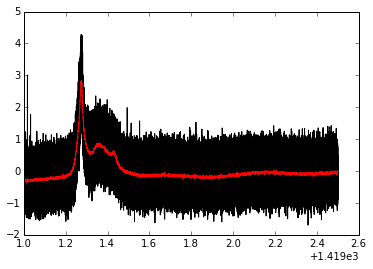

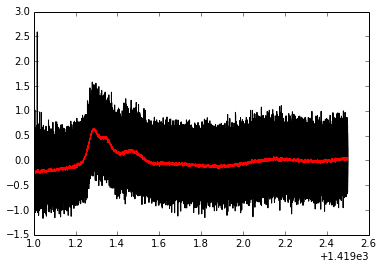

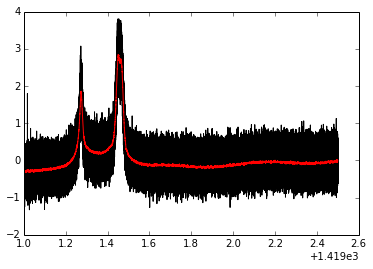

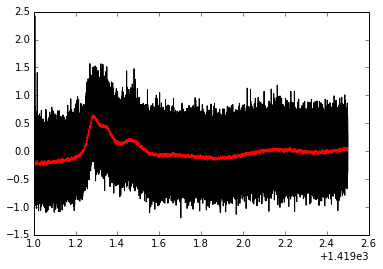

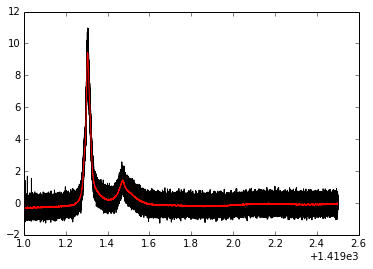

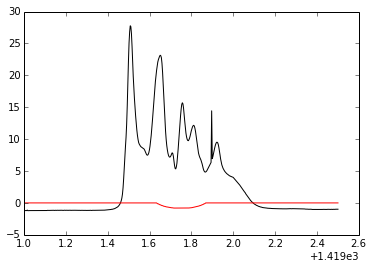

In [84]:
#test out fit function
for i in range(len(calibrated_spectra)):
    plt.plot(freqs[i], calibrated_spectra[i], color = 'black')
    plt.plot(freqs[i], fit(calibrated_spectra[i]), color = 'red')
    plt.show()